In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
import networkx as nx
from collections import Counter
from collections import defaultdict
import json
from google.colab import drive
from community import best_partition, modularity
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
edge_path = '/content/drive/My Drive/Network Codes/datasets/TerroristRel.edges'
label_path = '/content/drive/My Drive/Network Codes/datasets/TerroristRel.node_labels'

In [ ]:
def load_data(edge_path, label_path):

    with open(edge_path, 'r') as f:
        edges = []
        for line in f:
            u,v = line.strip().split(',')
            edges.append([int(u)-1,int(v)-1])

    with open(label_path,'r') as f:
        labels = []
        for line in f:
            labels.append(int(line.split(',')[1]))

    G = nx.Graph()
    G.add_nodes_from(np.arange(len(labels),dtype = np.int))
    G.add_edges_from(edges)

    for n,d in G.nodes(data = True):
        d['label'] = labels[n]

    return G, labels

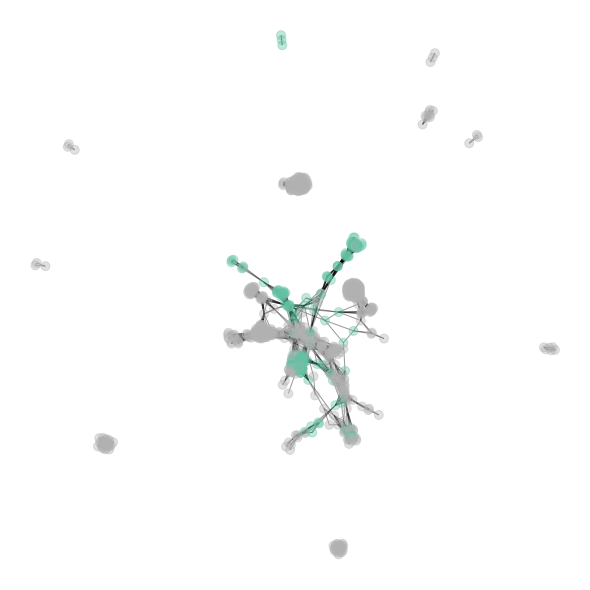

In [ ]:
G,labels = load_data(edge_path, label_path)
figsize(8,8)
nx.draw(G,node_size = 80,alpha = 0.4,pos = nx.spring_layout(G),node_color = labels,cmap = plt.get_cmap('Set2'))
plt.savefig(os.path.join('/content/drive/My Drive/Network Codes/datasets/','terrorist_original_graph.png'),dpi = 300)

## Components

In [ ]:
components = sorted(nx.connected_components(G),key = lambda x:len(x),reverse = True)
[len(comp) for comp in components]

[687, 110, 28, 26, 9, 6, 3, 3, 3, 3, 3]

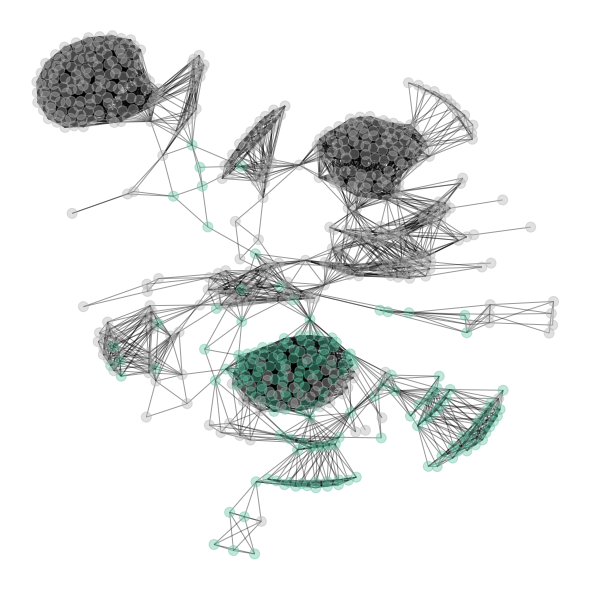

In [ ]:
S = G.subgraph(components[0])

pos = nx.kamada_kawai_layout(S)
s_labels = [d['label'] for n,d in S.nodes(data = True)]
nx.draw(S,alpha = 0.4,node_size = 100,node_color = s_labels,cmap = plt.get_cmap('Set2'),pos = pos)
plt.savefig(os.path.join('/content/drive/My Drive/Network Codes/datasets/','terrorist_largest_connected_components.png'),dpi = 300)

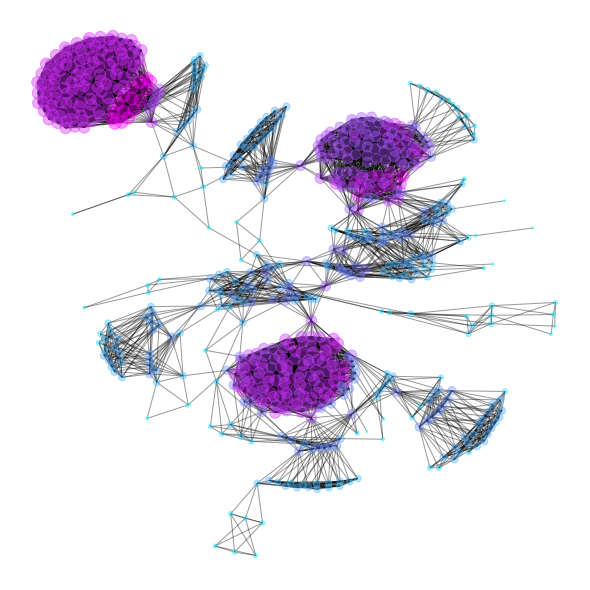

In [ ]:
deg_cent = nx.degree_centrality(S)
deg_cent = [v for k,v in deg_cent.items()]
nx.draw(S,alpha = 0.4,node_size = 3000*np.array(deg_cent),node_color = deg_cent,cmap = plt.get_cmap('cool'),pos = pos)
plt.savefig(os.path.join('/content/drive/My Drive/Network Codes/datasets/','terrorist_degree_centrality.png'),dpi = 300)

## Betweenness centrality - destroy the connections of terrorists

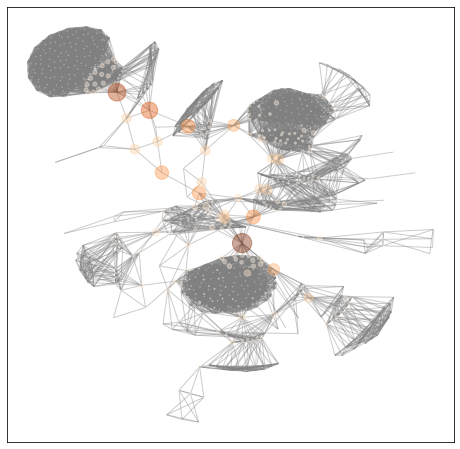

In [ ]:
bet_cent = nx.betweenness_centrality(S)
bet_cent = [v for k,v in bet_cent.items()]
nx.draw_networkx_nodes(S,alpha = 0.4,node_size = np.array(bet_cent) * 1000,node_color = bet_cent,cmap = plt.get_cmap('Oranges'),pos = pos)
nx.draw_networkx_edges(S,edge_color='gray',pos = pos,alpha = 0.4)
plt.savefig(os.path.join('/content/drive/My Drive/Network Codes/datasets/','terrorist_betweenness_centrality.png'),dpi = 300)

## Find leaders in a network

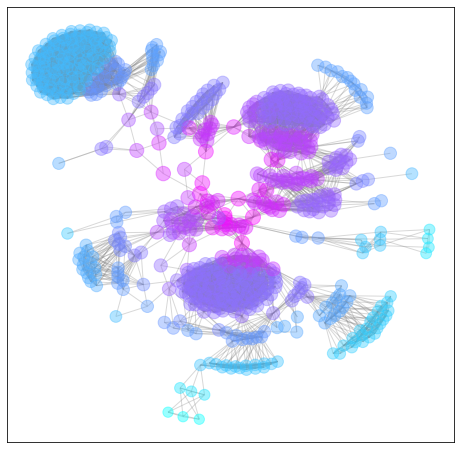

In [ ]:
clo_cent = nx.closeness_centrality(S)
clo_cent = [v for k,v in clo_cent.items()]
nx.draw_networkx_nodes(S,alpha = 0.4,node_size = np.array(clo_cent) * 1000,node_color = clo_cent,cmap = plt.get_cmap('cool'),pos = pos)
nx.draw_networkx_edges(S,edge_color='gray',pos = pos,alpha = 0.3)
plt.savefig(os.path.join('/content/drive/My Drive/Network Codes/datasets/','terrorist_closeness_centrality.png'),dpi = 300)

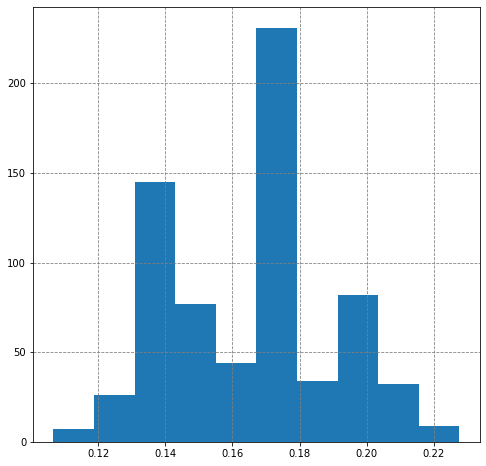

In [ ]:
plt.hist(clo_cent)
plt.grid(True, color = 'gray',linestyle = '--')
plt.show()

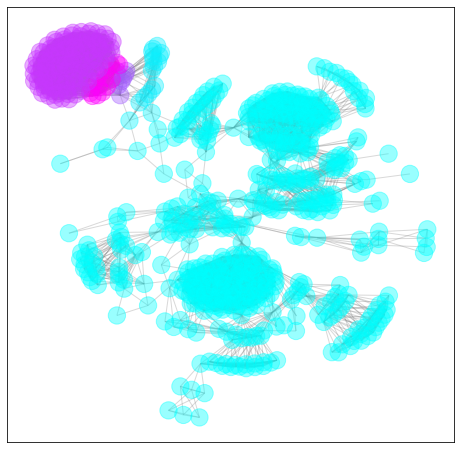

In [ ]:
eig_cent = nx.eigenvector_centrality(S,max_iter=1000)
eig_cent = [v for k,v in eig_cent.items()]
nx.draw_networkx_nodes(S,alpha = 0.4,node_color = eig_cent,cmap = plt.get_cmap('cool'),pos = pos)
nx.draw_networkx_edges(S,edge_color='gray',pos = pos,alpha = 0.3)
plt.savefig(os.path.join('/content/drive/My Drive/Network Codes/datasets/','terrorist_eigenvector_centrality.png'),dpi = 300)

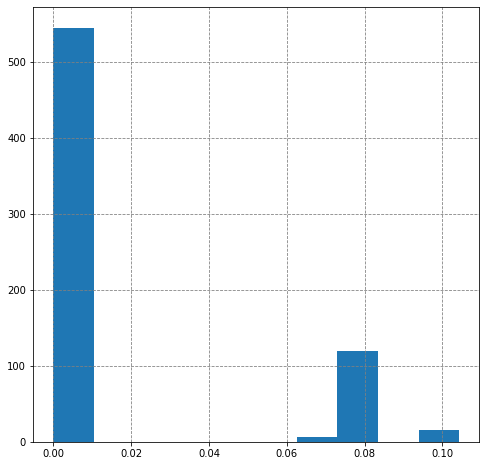

In [ ]:
plt.hist(eig_cent)
plt.grid(True, color = 'gray',linestyle = '--')
plt.show()

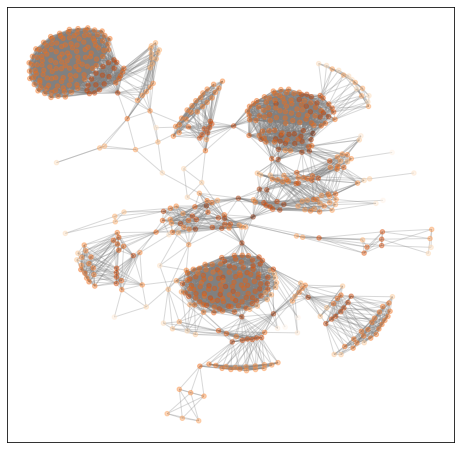

In [ ]:
prs = nx.pagerank(S)
prs = [v for k,v in prs.items()]
nx.draw_networkx_nodes(S,alpha = 0.4,node_color = prs,cmap = plt.get_cmap('Oranges'),pos = pos,node_size = 20)
nx.draw_networkx_edges(S,edge_color='gray',pos = pos,alpha = 0.3)

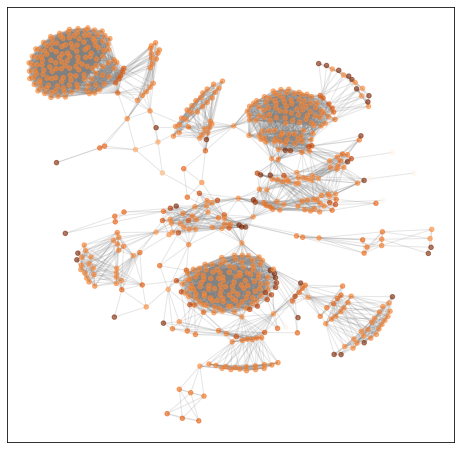

In [ ]:
clust = nx.clustering(S)
clust = [v for k,v in clust.items()]
nx.draw_networkx_nodes(S,alpha = 0.6,node_color = clust,cmap = plt.get_cmap('Oranges'),pos = pos,node_size = 20)
nx.draw_networkx_edges(S,edge_color='gray',pos = pos,alpha = 0.2)
plt.show()

In [ ]:
from community import best_partition, modularity
import os

In [ ]:
partition = best_partition(S)
comm = list(partition.values())

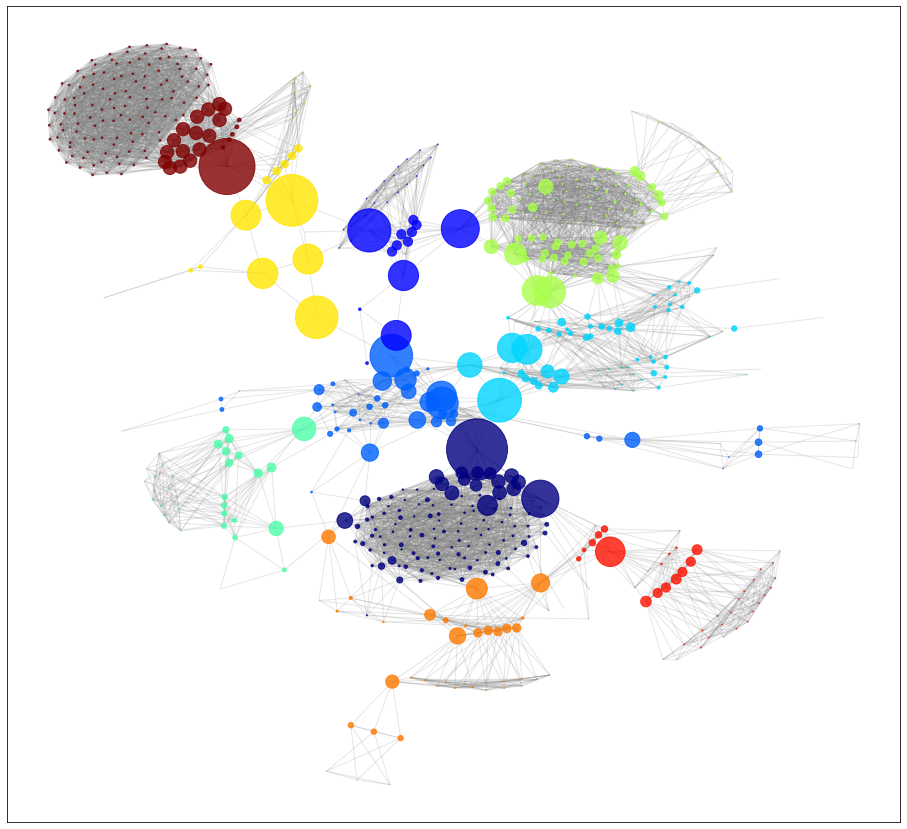

In [ ]:
figsize(16,15)
nx.draw_networkx_nodes(S,pos = pos,node_color = comm,alpha = 0.8,cmap = plt.get_cmap('jet'),node_size = 10000 * np.array(bet_cent))
nx.draw_networkx_edges(S,pos = pos,alpha = 0.2,edge_color = 'gray')
plt.savefig(os.path.join('/content/drive/My Drive/Network Codes/datasets/','terrorist.png'),dpi = 300)
plt.show()

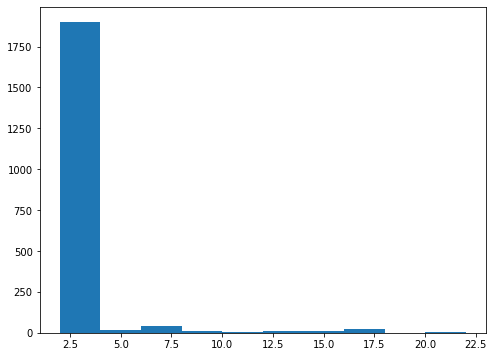

In [ ]:
figsize(8,6)
cliques = list(nx.find_cliques(S))
clique_sizes = [len(c) for c in cliques ]
plt.hist(clique_sizes)
plt.show()

## Large cliques k = 10

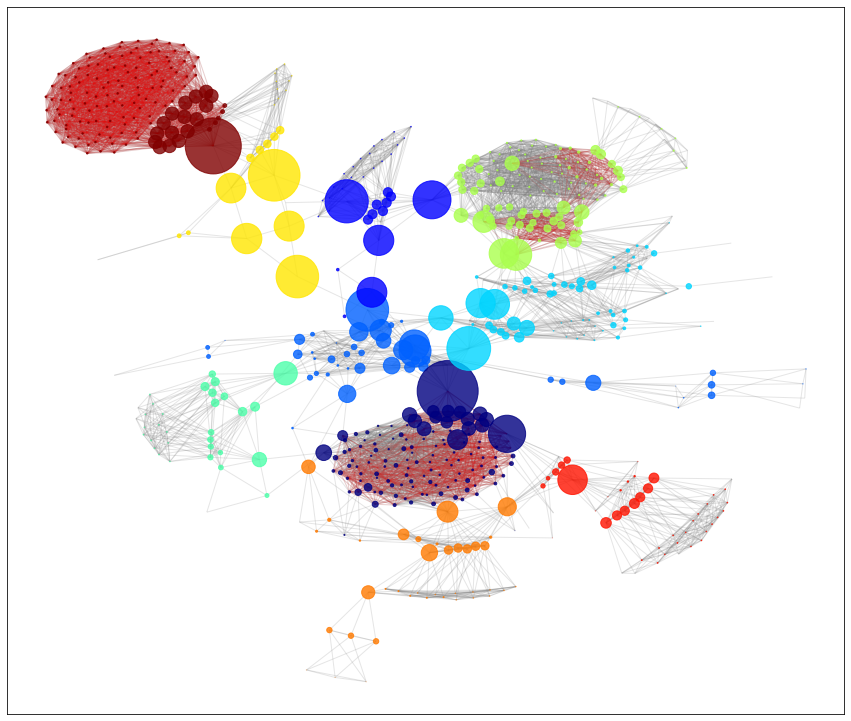

In [ ]:
from itertools import combinations
figsize(15,13)

k_cli = 15
large_cliques = [cli for cli in cliques if len(cli) > k_cli]
nx.draw_networkx_nodes(S,pos = pos,node_color = comm,alpha = 0.8,cmap = plt.get_cmap('jet'),node_size = 10000 * np.array(bet_cent))
nx.draw_networkx_edges(S,pos = pos,alpha = 0.2,edge_color = 'gray')

for cli in large_cliques:
    es = []
    for u,v in combinations(cli,2):
        es.append([u,v])
    nx.draw_networkx_edges(S,edgelist = es, pos = pos,edge_color = 'red',alpha = 0.1 )

plt.savefig(os.path.join('/content/drive/My Drive/Network Codes/datasets/','terrorist_cliques.png'),dpi = 300)

> 从网络图中可以看出，度中心性较大的点，betweenness中心性较小，处于控制和关键消息链路的节点只跟特定的二级节点相连，底层节点紧密联系。            
> Betweenness较大的节点 （社群间信息传播）          
> Betweenness中等大小的节点，连接控制节点和底层节点              
> Betweenness较小的底层节点，紧密连接，clustering coefficient很高，能达到15-17 clique  

In [ ]:
nx.degree_assortativity_coefficient(S)

0.8435835551564467

> 由于底层节点之间的紧密连接，导致整图的assortativity很大

> 断开degree centrality较大的节点

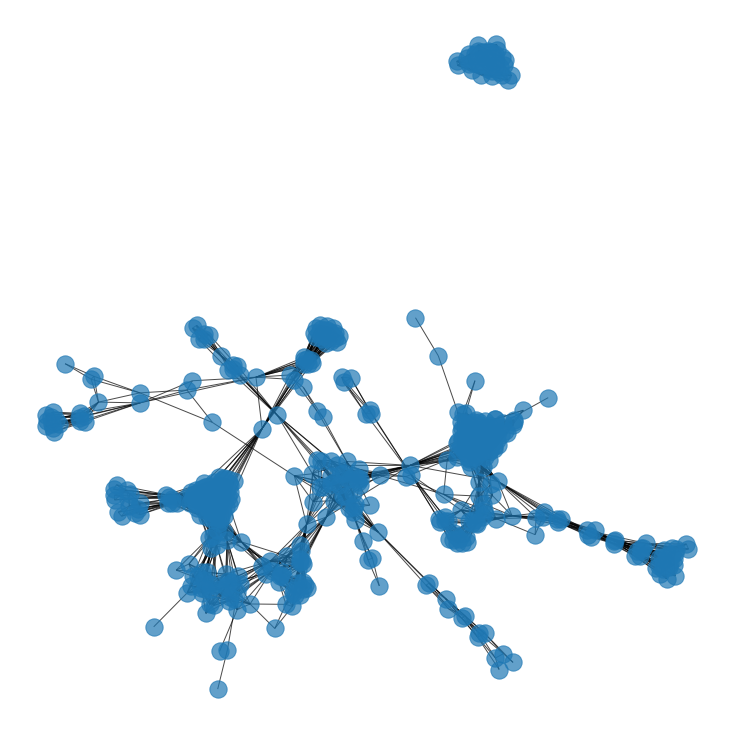

In [ ]:
to_destroy = np.argsort(deg_cent)[-150:]
remaining = [n for n in S.nodes() if n not in to_destroy]
SS = S.subgraph(remaining)
pos = nx.kamada_kawai_layout(SS)
figsize(10,10)
nx.draw(SS,alpha = 0.7)

> 断开Betweenness centrality 较大的节点 - 将terrorist网络撕裂

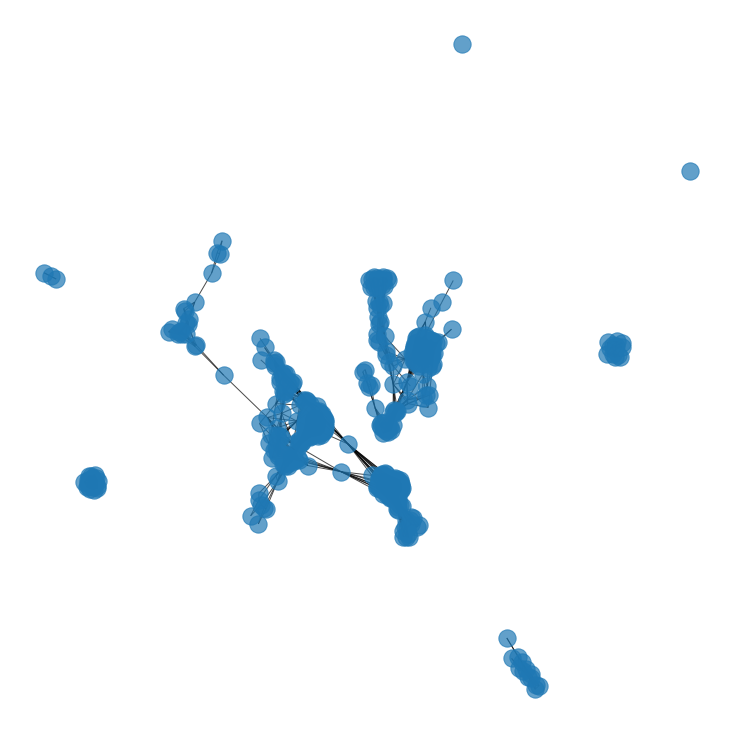

In [ ]:
to_destroy = np.argsort(bet_cent)[-150:]
remaining = [n for n in S.nodes() if n not in to_destroy]
SS = S.subgraph(remaining)
pos = nx.kamada_kawai_layout(SS)
figsize(10,10)
nx.draw(SS,alpha = 0.7)

## Node clustering with simrank

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
def simrank(G,C = .5, iterations = 100,source = None,target = None):

    '''
        Calculate simrank matrix
        Parameters:
        --------
            G: networkx graph object
            C: constant value specified in simrank paper
            iterations: maximum iterations to take
            source: the source node to retrieve results, int value
            target: the target node to retrieve results, int valuee

        Returns:
        --------
            if source is None and target is None - simrank matrix S - numpy 2D array
            if source is not None and target not None - S[source, target]
            if source is not None and target is None - S[source]
    '''

    A = nx.to_numpy_matrix(G)
    A = A / A.sum(axis = 0)
    S = np.random.random((len(G),len(G)))

    for it in range(iterations):
        prev_S = S.copy()
        np.fill_diagonal(S, 1.0)
        S = C * np.dot(np.dot(A.T,S),A)

        if np.allclose(S,prev_S,atol = 1e-7):
            break
    
    print("Taking {} iterations.".format(it))
    
    if source is not None and target is not None:
        return S[source,target]
    if source is not None:
        return S[source]
    return S

def clustering(sim_mat,plot = False,max_clust = 4):
    Z = linkage(sim_mat,method = 'complete',metric = 'cosine')

    if plot:
        figsize(8,6)
        dendrogram(Z)
        plt.show()
    
    return fcluster(Z,max_clust,criterion='maxclust')

In [ ]:
T = simrank(S)

Taking 22 iterations.


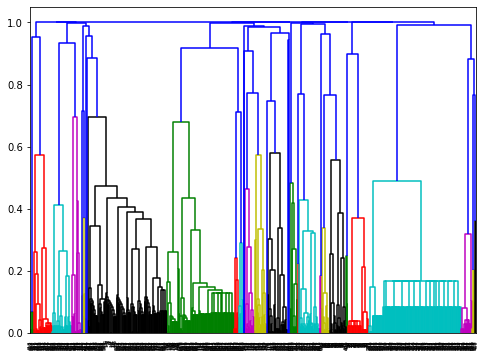

In [ ]:
clusters = clustering(T,plot = True, max_clust = 25)

## Find similar role of node

In [ ]:
def regular_equivalence_v2(G,alpha = .5, iterations = 20,tol = 1e-2):

    '''
        Vectorized version of regula equivalence
    '''

    # initialization similarity matrix and adjacency matrix
    sigma_ij = np.random.random((len(G),len(G)))
    A = nx.to_numpy_array(G)
    eye = np.eye(len(G))

    for it in range(iterations):
        sigma_prev = sigma_ij.copy()
        sigma_ij = alpha * np.dot(np.dot(A,sigma_ij),A) + eye

        if np.allclose(sigma_ij,sigma_prev,atol = tol):
            break
    print("Taking {} iterations.".format(it))

    return sigma_ij


In [ ]:
pos = nx.kamada_kawai_layout(S)

In [ ]:
# figsize(12,12)
# nx.draw_networkx_nodes(S,node_color = clusters,alpha = .4,pos = pos,cmap = plt.get_cmap('jet'))
# nx.draw_networkx_edges(S,pos = pos,alpha = 0.2,edge_color = 'gray')
# plt.show()

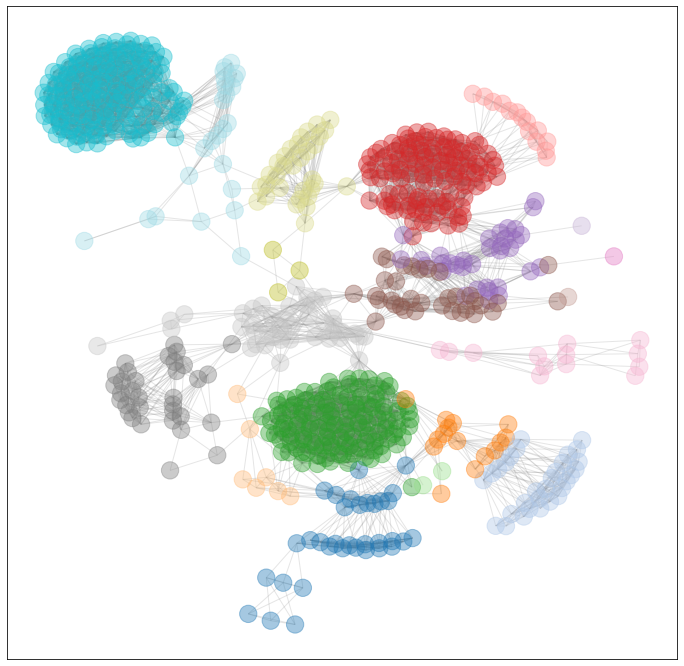

In [ ]:
noi = np.where(np.array(bet_cent) == max(bet_cent))[0][0]

# noi = 246
# ranking = np.array(simrank(S,C = .5, iterations = 100,source = noi ,target = None))[0]
# sim_nodes = np.array(S.nodes())[np.where(ranking >= np.percentile(ranking,70))[0]]
# colors = [1 if n in sim_nodes else 2 for n in S.nodes()]
figsize(12,12)
assaa
plt.show()

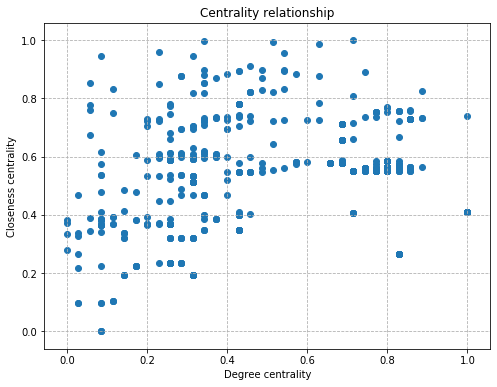

In [ ]:
figsize(8,6)
norm = lambda x: (np.array(x) - np.min(x)) / (np.max(x) - np.min(x))
plt.scatter(norm(deg_cent),norm(clo_cent))
plt.xlabel('Degree centrality')
plt.ylabel('Closeness centrality')
plt.grid(True, linestyle = '--')
# plt.xlim(0,10)
# plt.ylim(0,10)
plt.title('Centrality relationship')
plt.show()

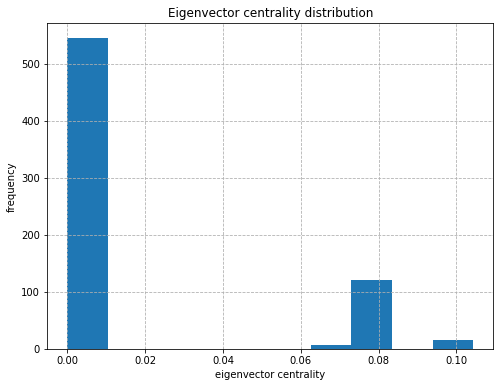

In [ ]:
plt.hist(eig_cent)
plt.grid(True,linestyle = '--')
plt.title('Eigenvector centrality distribution')
plt.xlabel('eigenvector centrality')
plt.ylabel('frequency')
plt.show()

In [ ]:
np.corrcoef(deg_cent,bet_cent)[0,1]

-0.02120755590228763

In [ ]:
np.corrcoef(deg_cent,clo_cent)[0,1]

0.008866926167752642

In [ ]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
dc = [v for k,v in nx.degree_centrality(G).items()]
bc = [v for k,v in nx.betweenness_centrality(G).items()]

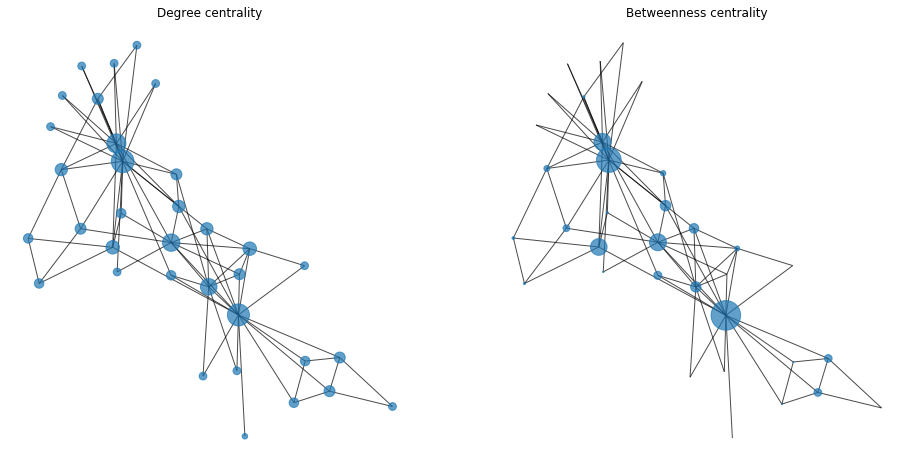

In [ ]:
figsize(16,8)
plt.subplot(1,2,1)
nx.draw(G,node_size = 1000* np.array(dc),pos = pos,alpha = 0.7)
plt.title('Degree centrality')
plt.subplot(1,2,2)
nx.draw(G,node_size = 2000* np.array(bc),pos = pos,alpha = 0.7)
plt.title('Betweenness centrality')
plt.show()

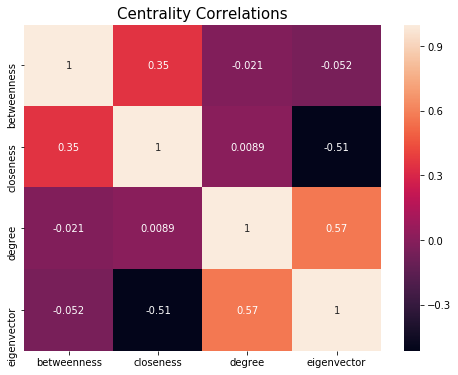

In [ ]:
df = pd.DataFrame(np.corrcoef([bet_cent,clo_cent,deg_cent,eig_cent]),columns = ['betweenness','closeness','degree','eigenvector'])
df.index = ['betweenness','closeness','degree','eigenvector']
figsize(8,6)
sns.heatmap(df,annot = True)
plt.title('Centrality Correlations',fontsize = 15)
plt.savefig(os.path.join('/content/drive/My Drive/Network Codes/datasets/','terrorist_centrality_correlation.png'),dpi = 300)
plt.show()

> 处于几何中心（closeness较大的点），eigenvector中心性较小（邻居的度较小），处于边缘的节点（closeness较小），邻居的度很大。         
> 度中心性较大的点，邻居的度也很大
> 处在重要路径的节点（betweenness较大），位于图几何中心，处在不重要路径的节点，位于几何边缘（但从相关性看，关系不明显）

correlation coefficient 0.9146430315025845


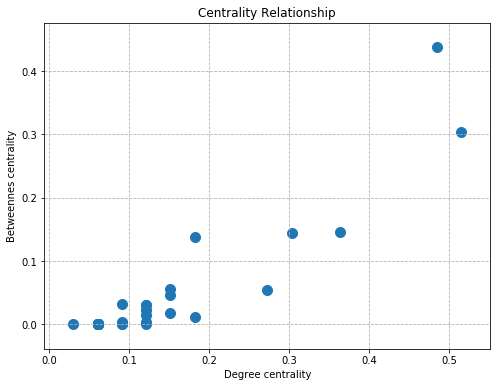

In [ ]:
figsize(8,6)
plt.scatter(dc,bc,s = 100)
plt.grid(True, linestyle = '--')
plt.xlabel('Degree centrality')
plt.ylabel('Betweennes centrality')
plt.title('Centrality Relationship')
print('correlation coefficient',np.corrcoef(dc,bc)[0,1])